In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initialize global variables
NOBS = 10
T = 4

#Strategy parameters
MEAN_GAMMA = 1
MEAN_RHO = 4
VAR_GAMMA = .05
VAR_RHO = .1

#Initial history e
a01 = 6.
a02 = 4


#Iterate each equilibrium T periods
data = []

for j in range(NOBS):
    
    #set parameters for 2 possible equilibria
    gamma = np.random.normal(MEAN_GAMMA,VAR_GAMMA)
    rho = np.random.normal(MEAN_RHO,VAR_RHO)
    
    #set up strategies
    eq0 = lambda (a1,a2): (gamma) * a2  + (1-gamma)*a1
    eq1 = lambda (a1,a2): rho
    
    #choose 1 randomly
    eq = np.random.choice([eq0,eq1])
    
    #begin history
    h = [np.array( [eq((a01,a02)),eq((a02,a01))] )]
    
    #iterate forward T periods
    for t in range(T):
        a1,a2 = h[t]
        at = np.array([eq((a1,a2)),eq((a2,a1))])
        h.append(at)
    
    h = np.array(h)
    data.append(h)

    
data = np.array(data)
print data.shape

(10, 5, 2)


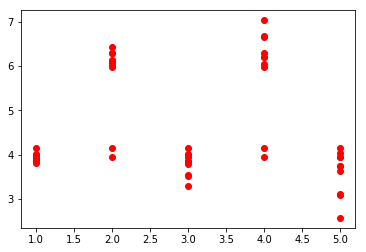

In [3]:
#format data for plotting
a1_obs = data[:,:,0].reshape(NOBS*(T+1))
a2_obs = data[:,:,1].reshape(NOBS*(T+1))

time_period = np.array(range(1,T+2))
time_period = np.tile(time_period,NOBS)

plt.plot(time_period,a1_obs,color ='r',marker="o",linestyle="")
plt.savefig('a1.png')

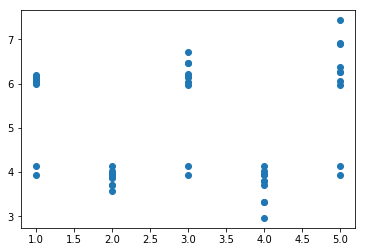

In [4]:
plt.plot(time_period,a2_obs,marker="o",linestyle="")
plt.savefig('a2.png')